# K-Means Clustering - Methods using Scikit-learn in Python - Tutorial 23 in Jupyter Notebook

## K-means method

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
%matplotlib inline
rcParams['figure.figsize'] = 15, 12


In [14]:
iris = datasets.load_iris()

X = scale(iris.data)

y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:10,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

## Building and running your model

In [15]:
clustering = KMeans(n_clusters=3, random_state=5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

## Plotting your model outputs

In [16]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal Length', 'Speal Width', 'Petal Lenght', 'Pethal Width']

y.columns = ['Targets']

Text(0.5, 1.0, 'K-Means Classification')

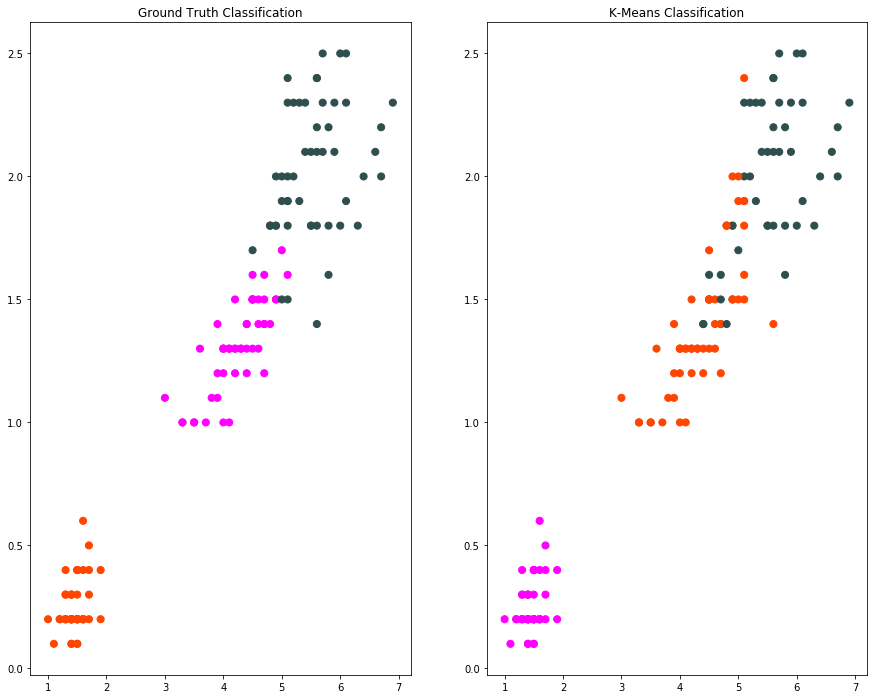

In [44]:
color_theme = np.array(['OrangeRed', 'Magenta', 'DarkSlateGray'])

plt.subplot(1,2,1)
plt.scatter(x=iris_df['Petal Lenght'], y=iris_df['Pethal Width'], c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')
plt.subplot(1,2,2)
plt.scatter(x=iris_df['Petal Lenght'], y=iris_df['Pethal Width'], c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')


Text(0.5, 1.0, 'K-Means Classification Relabeled')

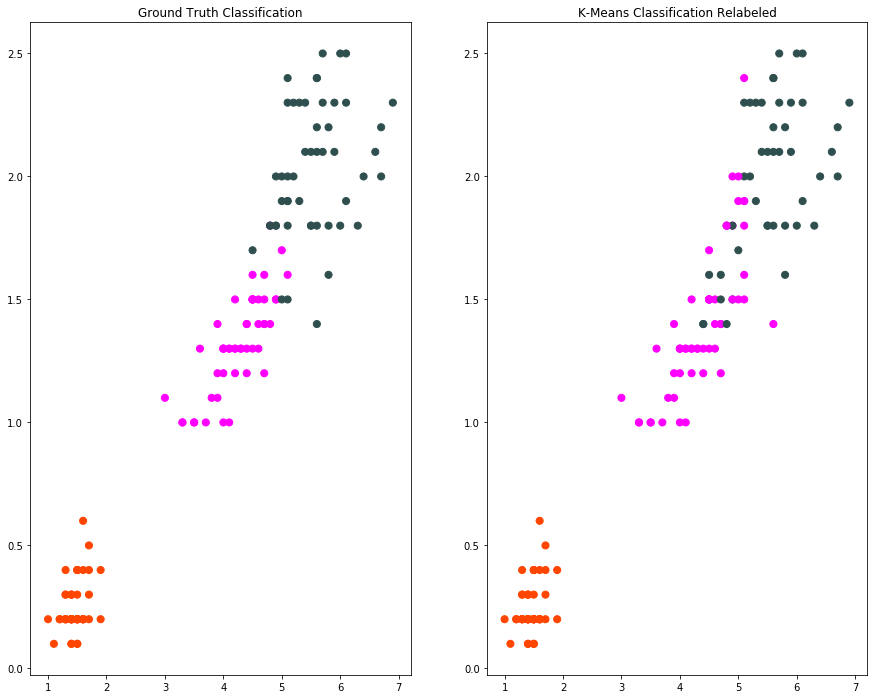

In [45]:
relabel = np.choose(clustering.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1,2,1)
plt.scatter(x=iris_df['Petal Lenght'], y=iris_df['Pethal Width'], c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')
plt.subplot(1,2,2)
plt.scatter(x=iris_df['Petal Lenght'], y=iris_df['Pethal Width'], c=color_theme[relabel], s=50)
plt.title('K-Means Classification Relabeled')


## Evaluate your clustering results

In [47]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [53]:
confusion_matrix(y, relabel)

array([[50,  0,  0],
       [ 0, 39, 11],
       [ 0, 14, 36]])

In [54]:
confusion_matrix(iris.target, relabel)

array([[50,  0,  0],
       [ 0, 39, 11],
       [ 0, 14, 36]])

In [63]:
sum(1 for i in iris.target if i == 0), sum(1 for i in iris.target if i == 1), sum(1 for i in iris.target if i == 2)

(50, 50, 50)

In [64]:
sum(1 for i in relabel if i == 0), sum(1 for i in relabel if i == 1), sum(1 for i in relabel if i == 2)

(50, 53, 47)